In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import humanize
import plotly.express as px

In [2]:
sns.set_style('darkgrid')

In [3]:
apartments = pd.read_csv('../../data/processed/apartments.csv')
chapinero =  apartments[(apartments['tipo_operacion'] == 'VENTA') & (apartments['localidad'] == 'CHAPINERO') & (apartments['coords_modified'] == False)]
chapinero = chapinero.drop(columns=['precio_arriendo'])
chapinero.head()

,codigo,tipo_propiedad,tipo_operacion,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,...,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm
6,3390-M4320821,APARTAMENTO,VENTA,3.900000e+09,432.00,4.0,5.0,3000000.0,4.0,CHICO,...,0,0,1,1,False,CHAPINERO,S.C. EL NOGAL,Héroes,960.91,0
17,897-M4156030,APARTAMENTO,VENTA,3.900000e+08,40.00,1.0,2.0,NaN,1.0,CHAPINERO ALTO,...,0,0,1,0,False,CHAPINERO,S.C. CHAPINERO CENTRAL,Calle 57,242.21,1
18,11301-1492,APARTAMENTO,VENTA,2.100000e+09,350.00,3.0,4.0,2040000.0,3.0,OTROS,...,0,1,1,0,False,CHAPINERO,CHICO ORIENTAL,Calle 85,2151.16,0
19,11013-M4424136,APARTAMENTO,VENTA,8.450000e+08,138.96,3.0,4.0,1170000.0,2.0,CHICO,...,0,0,1,0,False,CHAPINERO,S.C. CHICO NORTE,Virrey,1115.25,0
20,293-M3798297,APARTAMENTO,VENTA,1.700000e+09,178.00,3.0,4.0,1128000.0,3.0,CHAPINERO ALTO,...,0,1,1,0,False,CHAPINERO,ZAMUDIO,Flores,1138.96,0


In [4]:
chapinero.shape

(7174, 37)

In [5]:
chapinero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7174 entries, 6 to 43690
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   codigo                               7174 non-null   object 
 1   tipo_propiedad                       7174 non-null   object 
 2   tipo_operacion                       7174 non-null   object 
 3   precio_venta                         7174 non-null   float64
 4   area                                 7174 non-null   float64
 5   habitaciones                         7174 non-null   float64
 6   banos                                7174 non-null   float64
 7   administracion                       6523 non-null   float64
 8   parqueaderos                         7174 non-null   float64
 9   sector                               6886 non-null   object 
 10  estrato                              7170 non-null   float64
 11  antiguedad                        

In [6]:
chapinero.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta', 'area',
       'habitaciones', 'banos', 'administracion', 'parqueaderos', 'sector',
       'estrato', 'antiguedad', 'estado', 'longitud', 'latitud', 'descripcion',
       'datetime', 'website', 'compañia', 'fecha_actualizacion_precio_venta',
       'precio_venta_anterior', 'fecha_actualizacion_precio_arriendo',
       'precio_arriendo_anterior', 'jacuzzi', 'piso', 'closets', 'chimenea',
       'permite_mascotas', 'gimnasio', 'ascensor', 'conjunto_cerrado',
       'coords_modified', 'localidad', 'barrio', 'estacion_tm_cercana',
       'distancia_estacion_tm_m', 'is_cerca_estacion_tm'],
      dtype='object')

In [7]:
def format_tick_humanize(value, tick_number):
    return humanize.intword(value)

# Eliminar outliers

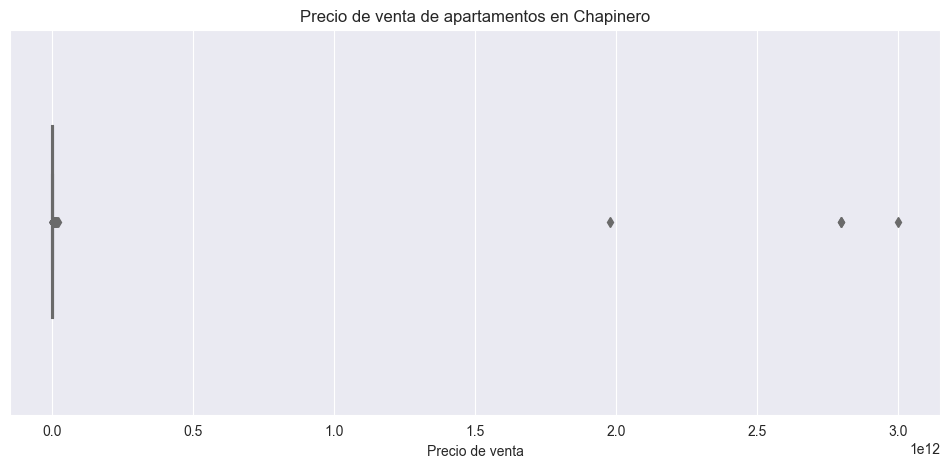

In [8]:
plt.figure(figsize=(12, 5))

sns.boxplot(
    chapinero,
    x='precio_venta',
    width=.5,
    palette='Set3',
)

plt.title('Precio de venta de apartamentos en Chapinero')
plt.xlabel('Precio de venta')
plt.show()

In [9]:
Q1 = chapinero['precio_venta'].quantile(0.25)
Q3 = chapinero['precio_venta'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = chapinero[(chapinero['precio_venta'] < lower) | (chapinero['precio_venta'] > upper)]
outliers.shape

(348, 37)

In [10]:
chapinero = chapinero[(chapinero['precio_venta'] > lower) & (chapinero['precio_venta'] < upper)]
chapinero.shape

(6826, 37)

# Analisis Univariado

## Area (m2)

### Eliminar outliers

In [11]:
# eliminar area igual a 0

chapinero = chapinero[chapinero['area'] > 0]

In [12]:
Q1 = chapinero['area'].quantile(0.25)
Q3 = chapinero['area'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = chapinero[(chapinero['area'] < lower) | (chapinero['area'] > upper)]
outliers.shape

(91, 37)

In [13]:
chapinero = chapinero[(chapinero['area'] > lower) & (chapinero['area'] < upper)]
chapinero.shape

(6709, 37)

### Analisis

In [14]:
chapinero.area.describe().apply(lambda x: humanize.intcomma(x)).to_frame().T

,count,mean,std,min,25%,50%,75%,max
area,"6,709.0",168.92259800268295,84.89170942168381,1.0,101.0,160.0,229.03,421.0


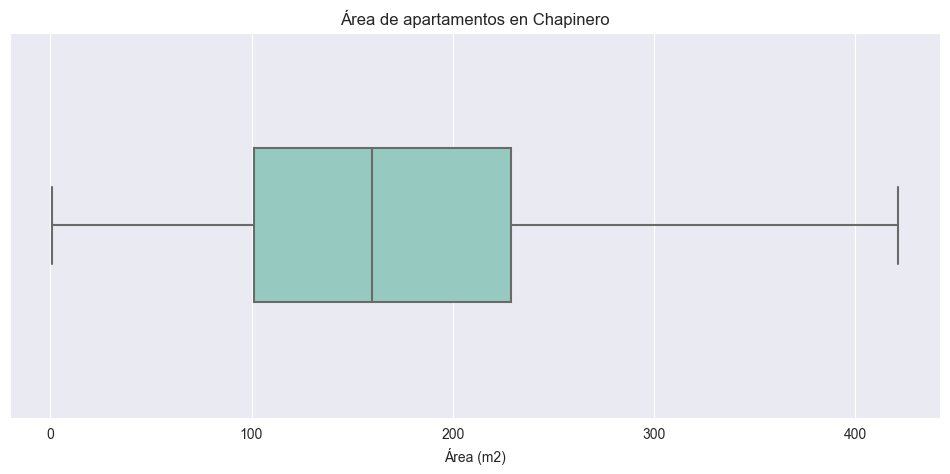

In [15]:
plt.figure(figsize=(12, 5))

sns.boxplot(
    chapinero,
    x='area',
    width=.4,
    palette='Set3',
)

plt.title('Área de apartamentos en Chapinero')
plt.xlabel('Área (m2)')
plt.show()

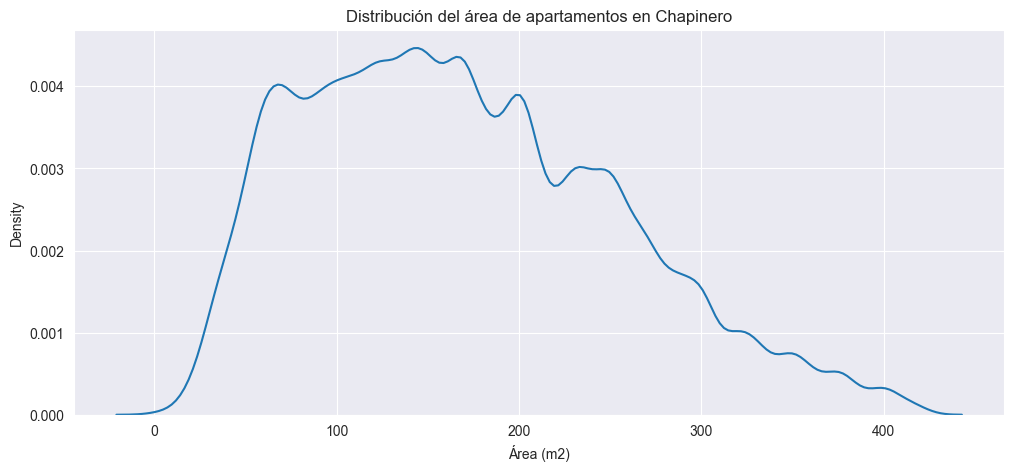

In [16]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='area',
    bw_adjust=.5,
)

plt.title('Distribución del área de apartamentos en Chapinero')
plt.xlabel('Área (m2)')
plt.show()

### Cercania a Transmilenio

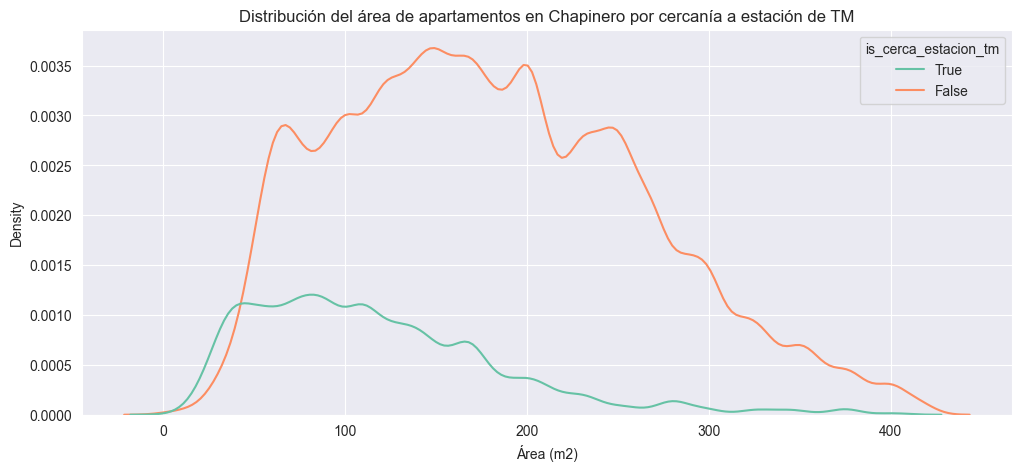

In [18]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='area',
    bw_adjust=.5,
    hue='is_cerca_estacion_tm',
    palette='Set2',
    hue_order=[True, False],
)

plt.title('Distribución del área de apartamentos en Chapinero por cercanía a estación de TM')
plt.xlabel('Área (m2)')
plt.show()

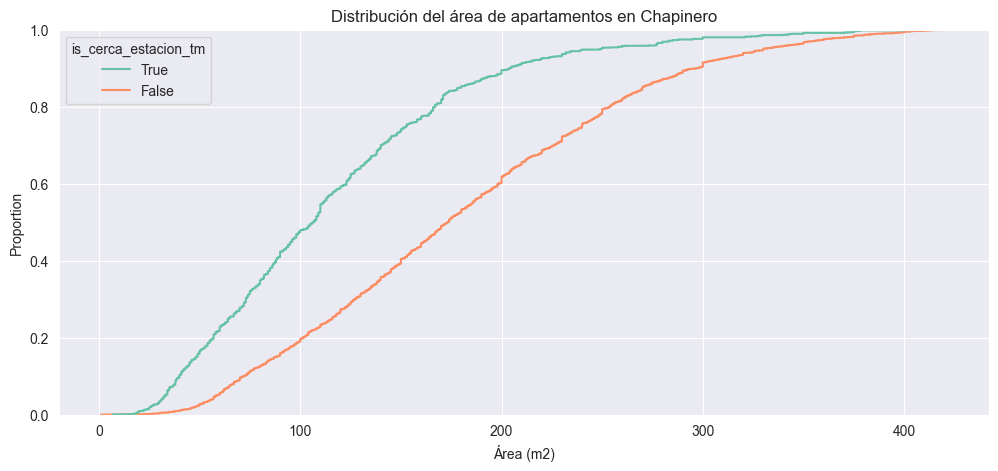

In [19]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='area',
    hue='is_cerca_estacion_tm',
    palette='Set2',
    hue_order=[True, False],
)

plt.title('Distribución del área de apartamentos en Chapinero')
plt.xlabel('Área (m2)')
plt.show()


### Estrato

In [20]:
chapinero.groupby('estrato')['area'].describe().applymap(lambda x: round(x, 1))

,count,mean,std,min,25%,50%,75%,max
estrato,,,,,,,,
0.0,8.0,188.9,114.6,104.0,108.8,137.0,224.5,370.0
1.0,10.0,160.6,46.5,78.0,134.1,163.5,175.7,253.0
2.0,4.0,53.3,20.7,30.0,39.8,53.5,67.0,76.2
3.0,151.0,61.8,44.4,6.9,35.0,46.0,74.8,280.0
4.0,587.0,89.5,55.6,14.0,53.0,74.0,110.0,343.0
5.0,691.0,131.2,67.3,25.7,83.0,116.0,168.0,420.0
6.0,5255.0,185.9,81.6,1.0,124.0,178.0,242.0,421.0


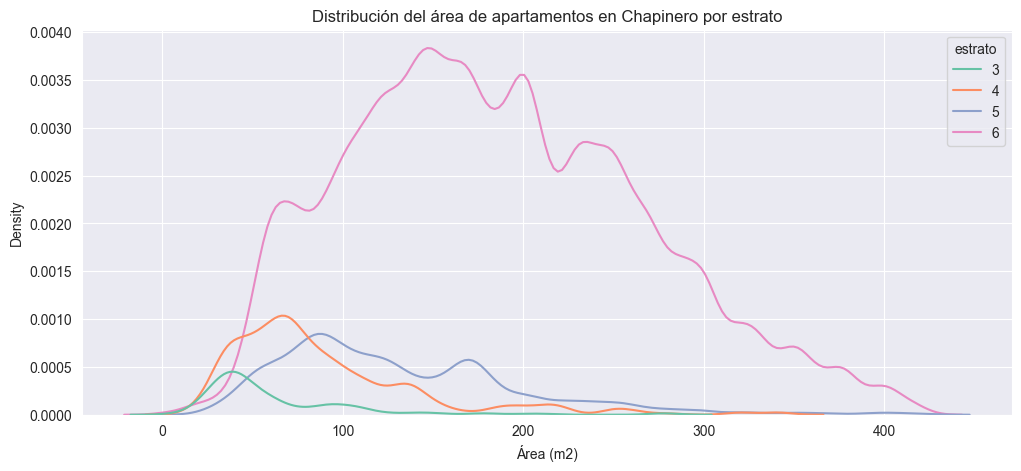

In [21]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='area',
    bw_adjust=.5,
    hue='estrato',
    hue_order=[3, 4, 5, 6],
    palette='Set2',
)

plt.title('Distribución del área de apartamentos en Chapinero por estrato')
plt.xlabel('Área (m2)')
plt.show()

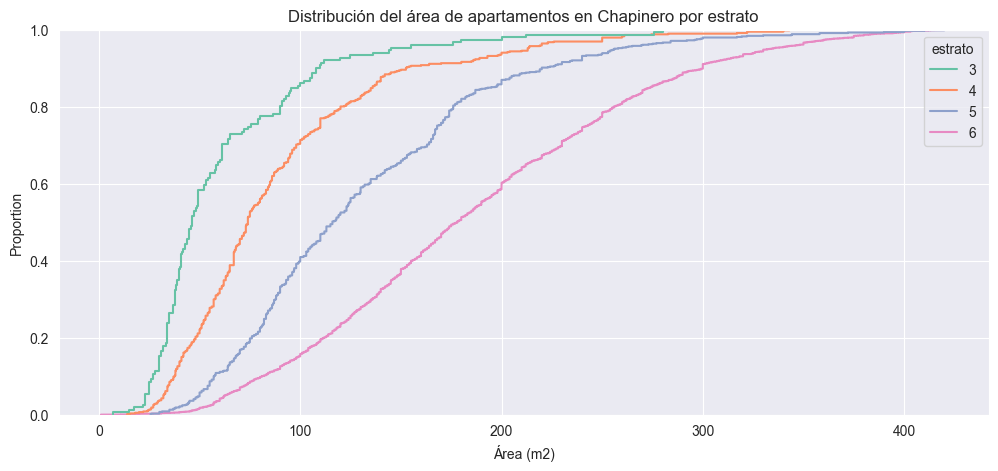

In [22]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='area',
    hue='estrato',
    palette='Set2',
    hue_order=[3, 4, 5, 6],
)

plt.title('Distribución del área de apartamentos en Chapinero por estrato')
plt.xlabel('Área (m2)')
plt.show()

### Antiguedad

In [23]:
chapinero.groupby('antiguedad')['area'].describe().applymap(lambda x: round(x, 1))

,count,mean,std,min,25%,50%,75%,max
antiguedad,,,,,,,,
ENTRE 0 Y 5 ANOS,1032.0,135.0,80.3,1.0,66.0,123.7,185.0,404.0
ENTRE 10 Y 20 ANOS,1431.0,169.5,85.6,18.0,101.0,160.0,230.0,417.0
ENTRE 5 Y 10 ANOS,1079.0,151.4,80.6,6.9,83.0,138.0,204.0,412.0
MAS DE 20 ANOS,2923.0,185.4,82.8,4.0,120.0,176.1,240.0,421.0
REMODELADO,243.0,189.0,85.7,27.0,130.5,192.0,243.5,410.0


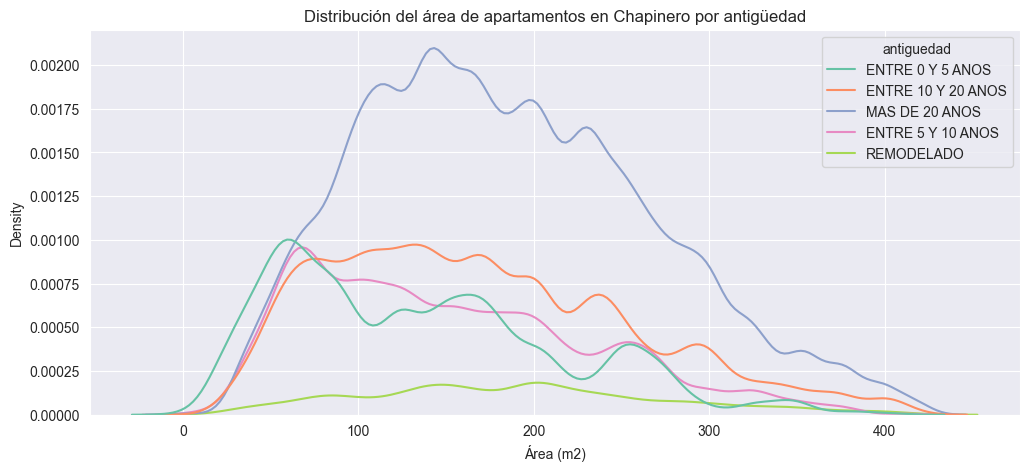

In [24]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='area',
    bw_adjust=.5,
    hue='antiguedad',
    palette='Set2',
)

plt.title('Distribución del área de apartamentos en Chapinero por antigüedad')
plt.xlabel('Área (m2)')
plt.show()

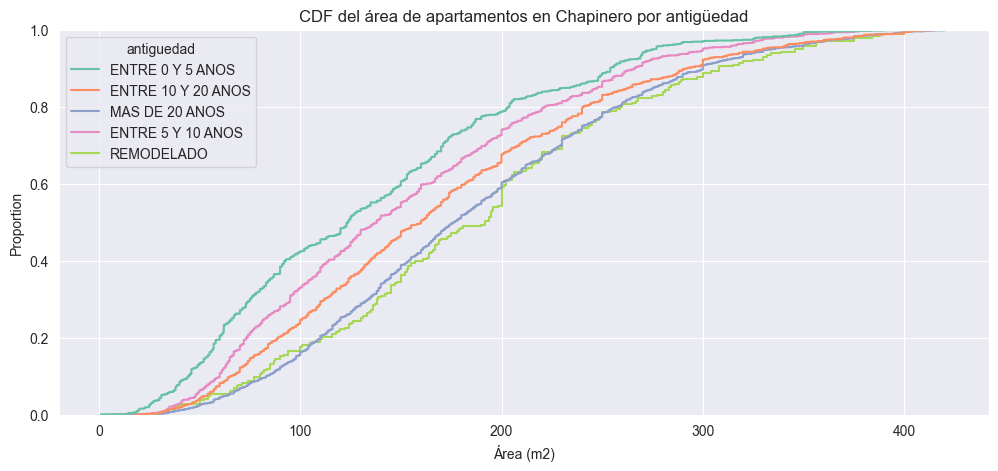

In [25]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='area',
    hue='antiguedad',
    palette='Set2',
)

plt.title('CDF del área de apartamentos en Chapinero por antigüedad')
plt.xlabel('Área (m2)')
plt.show()

### Estacion de TM Cercana

In [27]:
estacion_tm_cercana = chapinero[chapinero['is_cerca_estacion_tm'] == True]
estacion_tm_cercana_stats = estacion_tm_cercana.groupby('estacion_tm_cercana')['area'].describe().applymap(lambda x: round(x, 1)).sort_values(by='mean', ascending=False)
estacion_tm_cercana_stats

,count,mean,std,min,25%,50%,75%,max
estacion_tm_cercana,,,,,,,,
Héroes,20.0,151.4,92.1,48.0,98.0,119.5,178.5,403.0
Virrey,272.0,145.0,74.2,38.0,85.8,130.5,199.2,375.0
Calle 100,326.0,130.1,67.5,18.8,79.2,122.0,165.7,378.0
Flores,18.0,129.1,80.8,35.5,82.5,113.5,136.0,370.0
Calle 85,257.0,122.7,53.1,44.5,83.0,113.0,158.0,400.0
Calle 72,15.0,121.4,77.9,40.0,68.0,77.9,189.1,260.0
Calle 76,33.0,112.5,60.9,34.0,75.0,108.0,127.0,321.2
Calle 45,48.0,78.5,45.7,29.0,37.9,63.0,107.1,193.0
AV. 39,14.0,77.7,38.4,32.0,46.6,71.0,108.9,134.2


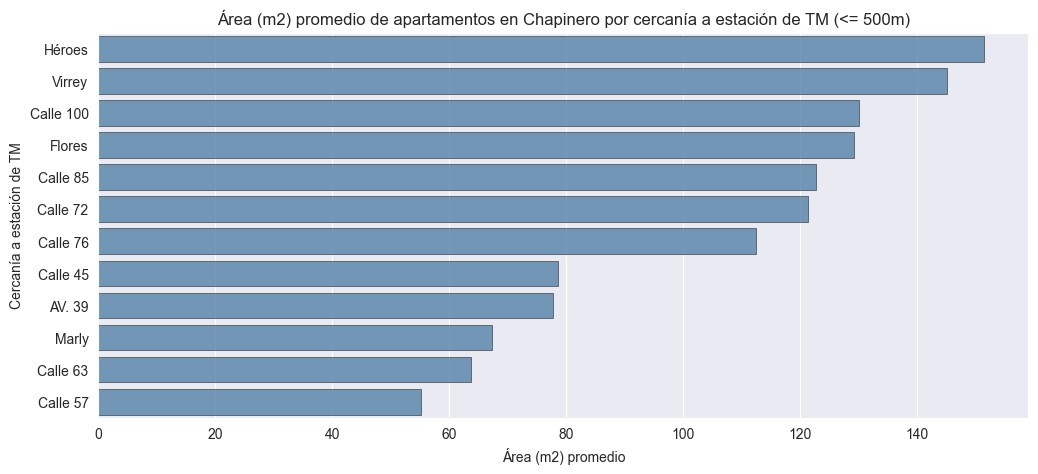

In [28]:
plt.figure(figsize=(12, 5))

sns.barplot(
    estacion_tm_cercana_stats,
    y=estacion_tm_cercana_stats.index,
    x='mean',
    # palette='Set2',
    color='steelblue',
    edgecolor='black',
    linewidth=.4,
    alpha=.8,
)

plt.title('Área (m2) promedio de apartamentos en Chapinero por cercanía a estación de TM (<= 500m)')
plt.xlabel('Área (m2) promedio')
plt.ylabel('Cercanía a estación de TM')
plt.show()

c:\Users\erik1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x500 with 0 Axes>

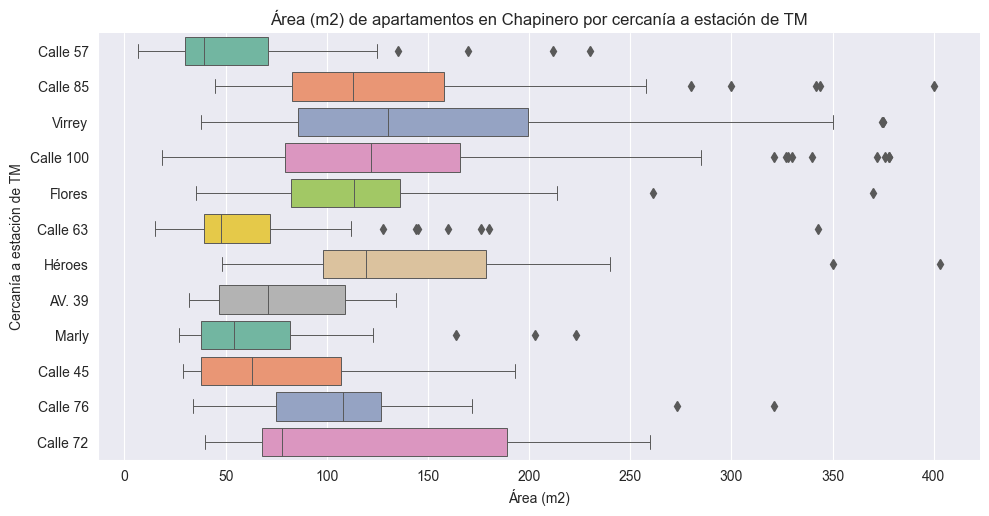

In [29]:
plt.figure(figsize=(12, 5))

sns.catplot(
    data=estacion_tm_cercana,
    x='area',
    y='estacion_tm_cercana',
    kind='box',
    height=5,
    aspect=2,
    palette='Set2',
    orient='h',
    linewidth=.7,
)

plt.title('Área (m2) de apartamentos en Chapinero por cercanía a estación de TM')
plt.xlabel('Área (m2)')
plt.ylabel('Cercanía a estación de TM')
plt.show()

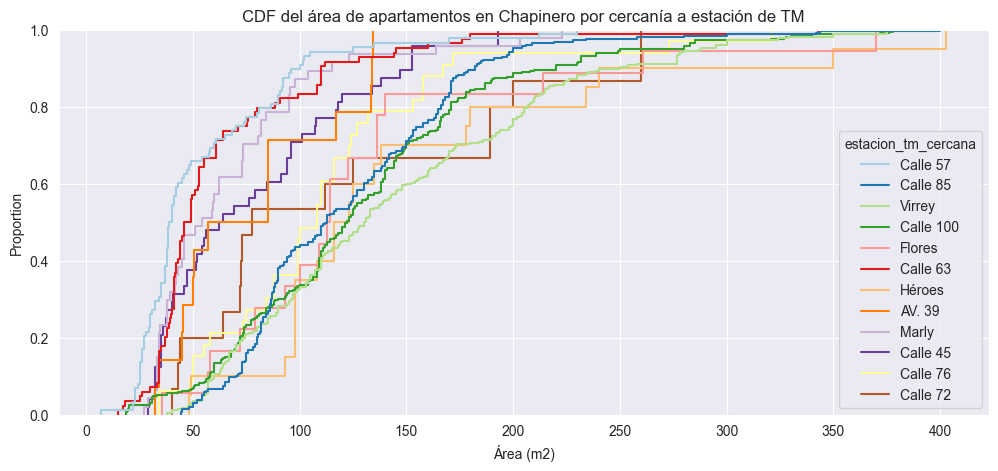

In [30]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    data=estacion_tm_cercana,
    x='area',
    hue='estacion_tm_cercana',
    palette='Paired',
)

plt.title('CDF del área de apartamentos en Chapinero por cercanía a estación de TM')
plt.xlabel('Área (m2)')
plt.show()

## Precio de venta

In [31]:
chapinero.precio_venta.describe().apply(lambda x: humanize.intword(x)).to_frame().T

,count,mean,std,min,25%,50%,75%,max
precio_venta,6.7 thousand,1.4 billion,860.9 million,1.2 million,750.0 million,1.2 billion,1.9 billion,4.0 billion


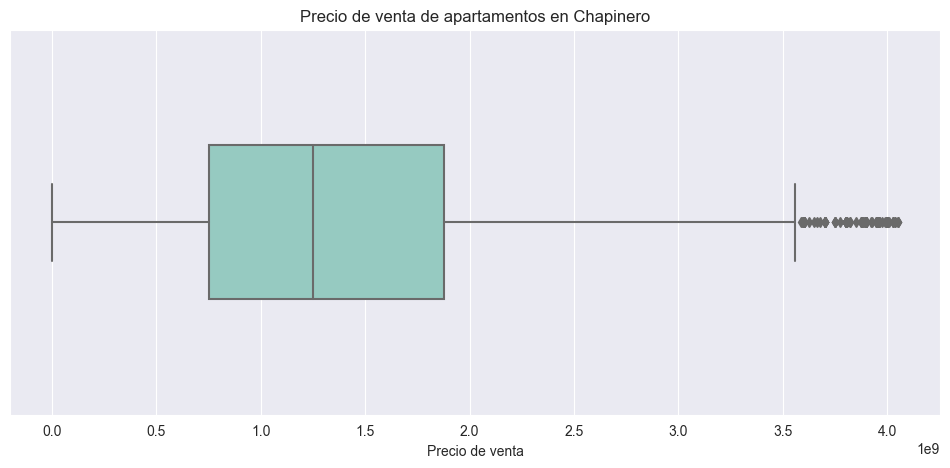

In [32]:
plt.figure(figsize=(12, 5))

sns.boxplot(
    chapinero,
    x='precio_venta',
    width=.4,
    palette='Set3',
)

plt.title('Precio de venta de apartamentos en Chapinero')
plt.xlabel('Precio de venta')
plt.show()

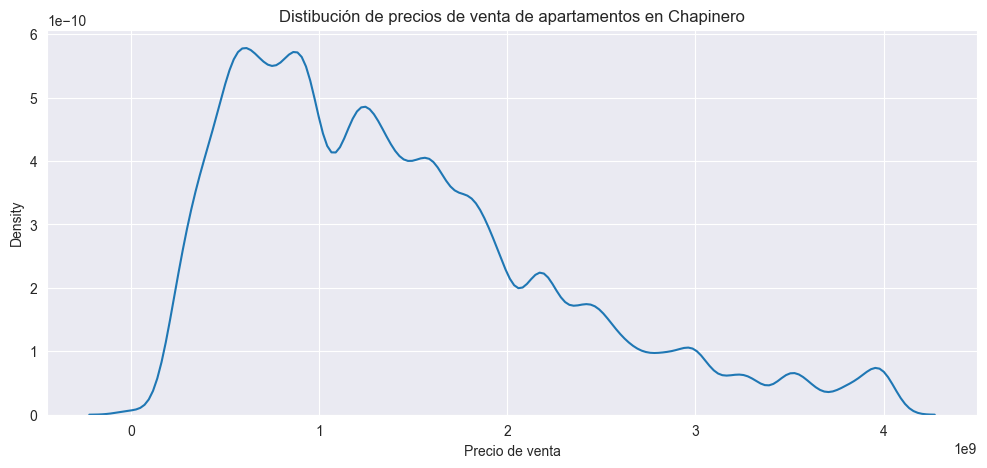

In [33]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='precio_venta',
    bw_adjust=.5,
)

plt.title('Distibución de precios de venta de apartamentos en Chapinero')
plt.xlabel('Precio de venta')
plt.show()

### Barrios

In [34]:
top_barrios = chapinero.groupby('barrio').agg(
    count=('barrio', 'count'),
    mean=('precio_venta', 'mean'),
    median=('precio_venta', 'median'),
    std=('precio_venta', 'std'),
).sort_values('mean', ascending=False)

# escoger los que tienen más de 20 registros para que sea más representativo
top_barrios = top_barrios[top_barrios['count'] > 20].head(10)
top_barrios.applymap(lambda x: humanize.intword(x))

,count,mean,median,std
barrio,,,,
LA CABRERA,313,2.1 billion,2.0 billion,878.7 million
CHICO ORIENTAL,140,2.1 billion,1.9 billion,883.0 million
S.C. EL RETIRO,139,2.0 billion,1.9 billion,951.7 million
PINAR ALTO - PINAR II,34,1.9 billion,1.7 billion,826.2 million
CHICO ALTO,102,1.9 billion,1.7 billion,703.0 million
BOSQUE EL RETIRO I SECTOR,173,1.9 billion,1.6 billion,902.8 million
S.C. EL BAGAZAL,26,1.8 billion,1.6 billion,816.2 million
LOS ROSALES,617,1.7 billion,1.6 billion,802.5 million
S.C. BELLAVISTA,465,1.7 billion,1.6 billion,777.6 million


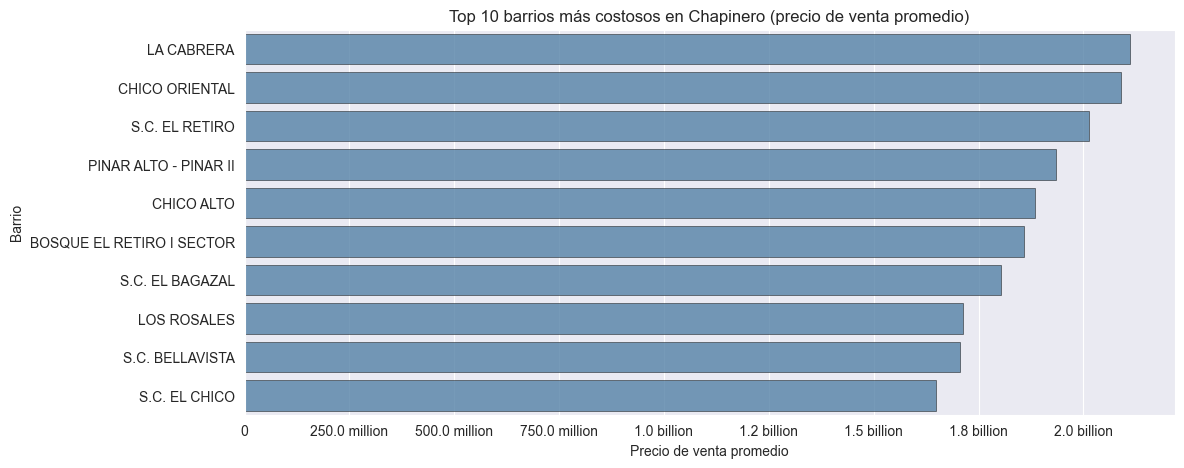

In [35]:
plt.figure(figsize=(12, 5))

sns.barplot(
    top_barrios,
    y=top_barrios.index,
    x='mean',
    color='steelblue',
    # palette='Set1',
    edgecolor='black',
    linewidth=.4,
    alpha=.8,
)

plt.title('Top 10 barrios más costosos en Chapinero (precio de venta promedio)')
plt.xlabel('Precio de venta promedio')
plt.ylabel('Barrio')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))

plt.show()

### Cercania a Transmilenio

In [37]:
chapinero.groupby('is_cerca_estacion_tm')['precio_venta'].describe().applymap(lambda x: humanize.intcomma(x))

,count,mean,std,min,25%,50%,75%,max
is_cerca_estacion_tm,,,,,,,,
0,"5,487.0","1,531,531,545.2464006","860,944,811.1587182","1,160,000.0","850,000,000.0","1,390,000,000.0","2,000,000,000.0","4,050,000,000.0"
1,"1,222.0","899,641,520.6546645","643,764,613.7331934","2,100,000.0","451,250,000.0","710,000,000.0","1,150,000,000.0","4,000,000,000.0"


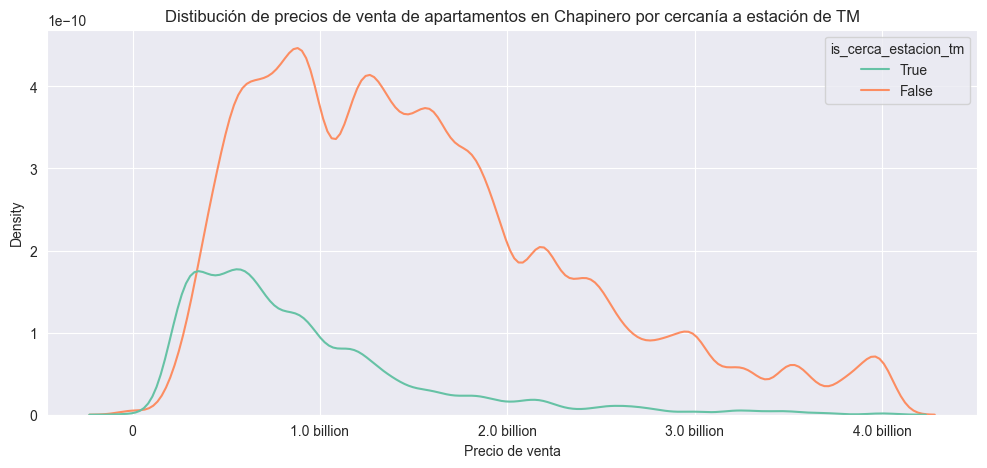

In [39]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='precio_venta',
    bw_adjust=.5,
    hue='is_cerca_estacion_tm',
    hue_order=[True, False],
    palette='Set2',
)

plt.title('Distibución de precios de venta de apartamentos en Chapinero por cercanía a estación de TM')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

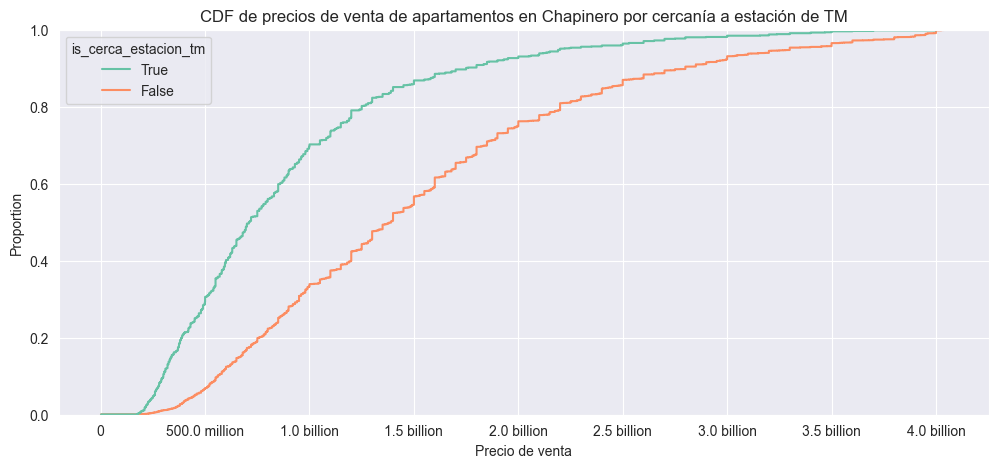

In [41]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='precio_venta',
    hue='is_cerca_estacion_tm',
    hue_order=[True, False],
    palette='Set2',
)

plt.title('CDF de precios de venta de apartamentos en Chapinero por cercanía a estación de TM')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

### Estrato

In [44]:
chapinero.groupby('estrato')['precio_venta'].describe().applymap(lambda x: humanize.intword(x))

,count,mean,std,min,25%,50%,75%,max
estrato,,,,,,,,
0.0,8,1.4 billion,734.0 million,660.0 million,840.0 million,1.1 billion,1.9 billion,2.5 billion
1.0,10,1.0 billion,557.5 million,505.0 million,646.2 million,912.5 million,1.2 billion,2.4 billion
2.0,4,391.2 million,114.0 million,235.0 million,343.8 million,420.0 million,467.5 million,490.0 million
3.0,151,370.9 million,239.4 million,175.0 million,260.0 million,310.0 million,383.4 million,1.8 billion
4.0,587,593.7 million,408.8 million,180.0 million,365.0 million,480.0 million,663.5 million,2.9 billion
5.0,691,1.0 billion,606.6 million,1.2 million,595.0 million,850.0 million,1.4 billion,4.0 billion
6.0,5.3 thousand,1.6 billion,847.7 million,1.6 million,930.0 million,1.4 billion,2.1 billion,4.0 billion


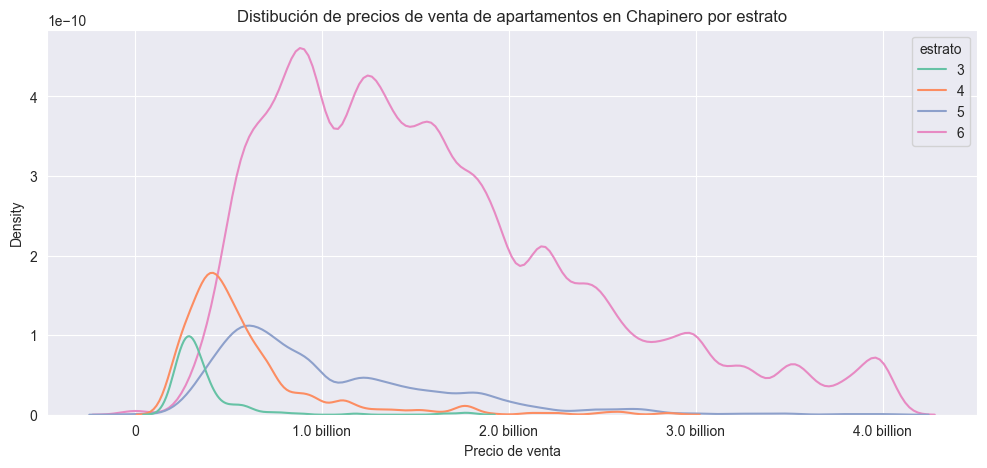

In [45]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='precio_venta',
    bw_adjust=.5,
    hue='estrato',
    hue_order=[3, 4, 5, 6],
    palette='Set2',
)

plt.title('Distibución de precios de venta de apartamentos en Chapinero por estrato')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

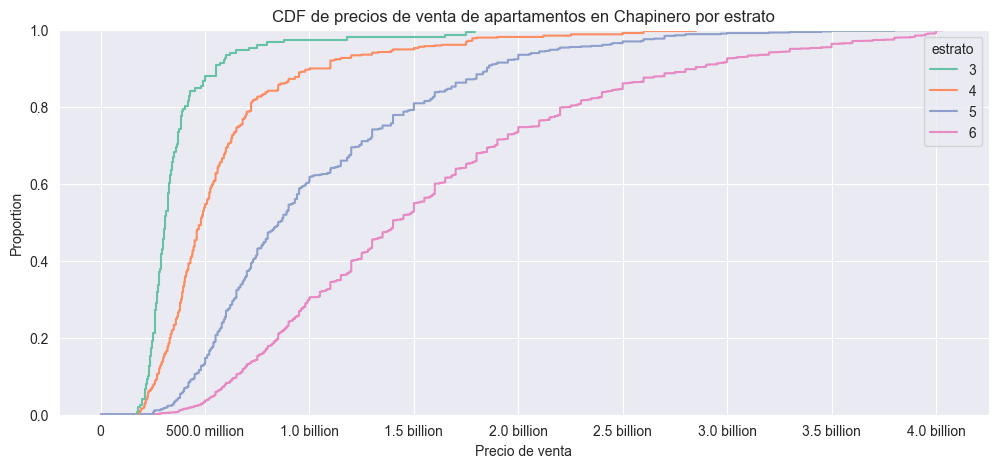

In [46]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='precio_venta',
    hue='estrato',
    hue_order=[3, 4, 5, 6],
    palette='Set2',
)

plt.title('CDF de precios de venta de apartamentos en Chapinero por estrato')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

In [47]:
chapinero.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta', 'area',
       'habitaciones', 'banos', 'administracion', 'parqueaderos', 'sector',
       'estrato', 'antiguedad', 'estado', 'longitud', 'latitud', 'descripcion',
       'datetime', 'website', 'compañia', 'fecha_actualizacion_precio_venta',
       'precio_venta_anterior', 'fecha_actualizacion_precio_arriendo',
       'precio_arriendo_anterior', 'jacuzzi', 'piso', 'closets', 'chimenea',
       'permite_mascotas', 'gimnasio', 'ascensor', 'conjunto_cerrado',
       'coords_modified', 'localidad', 'barrio', 'estacion_tm_cercana',
       'distancia_estacion_tm_m', 'is_cerca_estacion_tm'],
      dtype='object')

### Antiguedad del apartamento

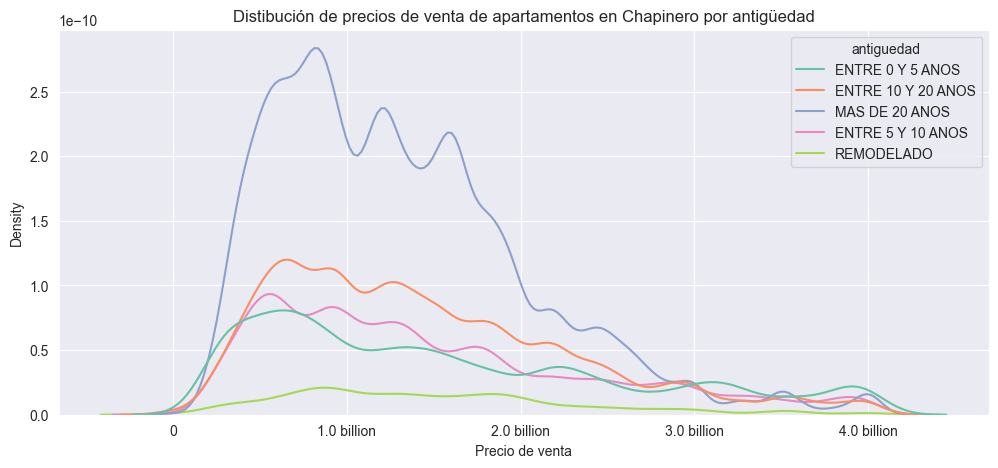

In [50]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    chapinero,
    x='precio_venta',
    bw_adjust=.5,
    hue='antiguedad',
    palette='Set2',
)

plt.title('Distibución de precios de venta de apartamentos en Chapinero por antigüedad')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

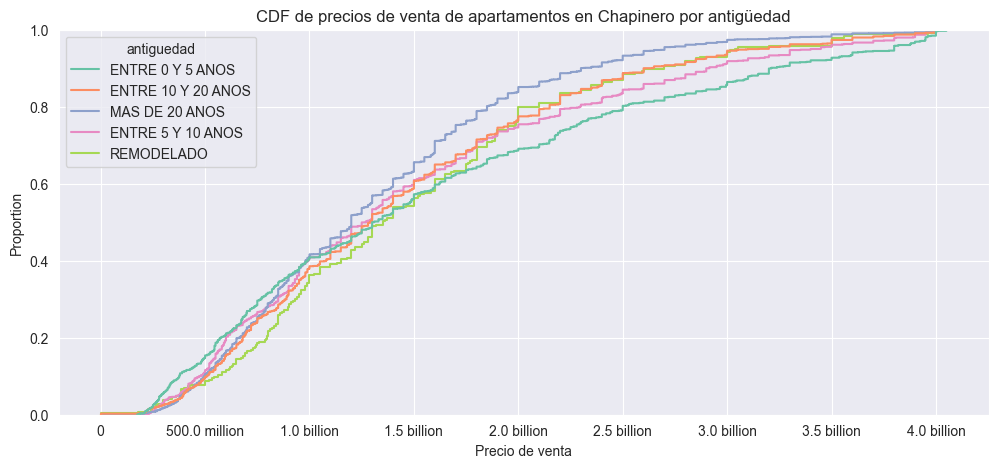

In [51]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    chapinero,
    x='precio_venta',
    hue='antiguedad',
    palette='Set2',
)

plt.title('CDF de precios de venta de apartamentos en Chapinero por antigüedad')
plt.xlabel('Precio de venta')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

### Estacion de TM Cercana

In [52]:
estacion_tm_cercana.groupby('estacion_tm_cercana')['precio_venta'].describe().sort_values('mean', ascending=False).applymap(lambda x: humanize.intword(x))

,count,mean,std,min,25%,50%,75%,max
estacion_tm_cercana,,,,,,,,
Virrey,272,1.3 billion,787.3 million,217.0 million,650.0 million,960.0 million,1.7 billion,3.7 billion
Calle 85,257,1.1 billion,576.5 million,370.0 million,630.0 million,965.0 million,1.4 billion,3.5 billion
Héroes,20,1.0 billion,1.1 billion,2.1 million,550.0 million,565.0 million,942.5 million,4.0 billion
Calle 100,326,925.8 million,512.7 million,255.0 million,612.5 million,840.0 million,1.1 billion,3.7 billion
Calle 72,15,769.8 million,444.0 million,219.0 million,480.0 million,680.0 million,862.5 million,1.8 billion
Flores,18,700.1 million,408.3 million,300.0 million,408.8 million,598.0 million,790.0 million,1.9 billion
Calle 76,33,673.9 million,396.6 million,190.0 million,425.0 million,620.0 million,770.0 million,2.0 billion
Calle 45,48,418.5 million,196.0 million,180.0 million,270.0 million,350.0 million,601.0 million,1.1 billion
AV. 39,14,391.4 million,127.2 million,185.0 million,342.5 million,372.5 million,471.2 million,630.0 million


In [53]:
estacion_tm_cercana_stats = estacion_tm_cercana.groupby('estacion_tm_cercana')['precio_venta'].describe().sort_values('mean', ascending=False)

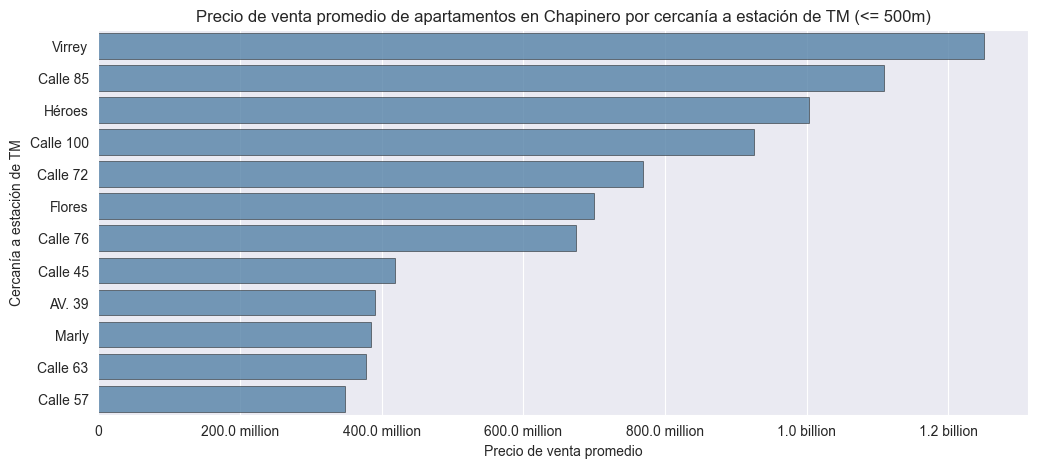

In [54]:
plt.figure(figsize=(12, 5))

sns.barplot(
    estacion_tm_cercana_stats,
    y=estacion_tm_cercana_stats.index,
    x='mean',
    color='steelblue',
    # palette='Set1',
    edgecolor='black',
    linewidth=.4,
    alpha=.8,
)

plt.title('Precio de venta promedio de apartamentos en Chapinero por cercanía a estación de TM (<= 500m)')
plt.xlabel('Precio de venta promedio')
plt.ylabel('Cercanía a estación de TM')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(format_tick_humanize))
plt.show()

## Antiguedad

In [55]:
chapinero.antiguedad.value_counts()

antiguedad
MAS DE 20 ANOS        2923
ENTRE 10 Y 20 ANOS    1431
ENTRE 5 Y 10 ANOS     1079
ENTRE 0 Y 5 ANOS      1032
REMODELADO             243
Name: count, dtype: int64

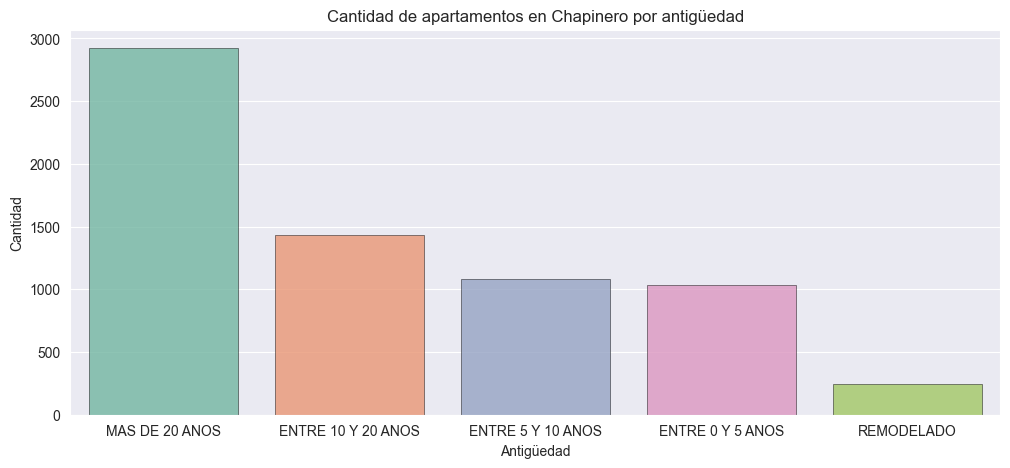

In [56]:
plt.figure(figsize=(12, 5))

sns.countplot(
    chapinero,
    x='antiguedad',
    order=chapinero.antiguedad.value_counts().index,
    palette='Set2',
    edgecolor='black',
    linewidth=.4,
    alpha=.8,
)

plt.title('Cantidad de apartamentos en Chapinero por antigüedad')
plt.xlabel('Antigüedad')
plt.ylabel('Cantidad')
plt.show()

### Barrios

In [57]:
chapinero.groupby('antiguedad')['barrio'].describe()

,count,unique,top,freq
antiguedad,,,,
ENTRE 0 Y 5 ANOS,1032,48,S.C. CHICO NORTE,148
ENTRE 10 Y 20 ANOS,1431,61,S.C. CHICO NORTE,191
ENTRE 5 Y 10 ANOS,1079,58,S.C. CHICO NORTE,146
MAS DE 20 ANOS,2923,67,LOS ROSALES,305
REMODELADO,243,43,S.C. CHICO NORTE,30


In [66]:
chapinero.groupby('antiguedad')['area'].describe().apply(lambda x: round(x,1))

,count,mean,std,min,25%,50%,75%,max
antiguedad,,,,,,,,
ENTRE 0 Y 5 ANOS,1032.0,135.0,80.3,1.0,66.0,123.7,185.0,404.0
ENTRE 10 Y 20 ANOS,1431.0,169.5,85.6,18.0,101.0,160.0,230.0,417.0
ENTRE 5 Y 10 ANOS,1079.0,151.4,80.6,6.9,83.0,138.0,204.0,412.0
MAS DE 20 ANOS,2923.0,185.4,82.8,4.0,120.0,176.1,240.0,421.0
REMODELADO,243.0,189.0,85.7,27.0,130.5,192.0,243.5,410.0


<Axes: xlabel='antiguedad', ylabel='mean'>

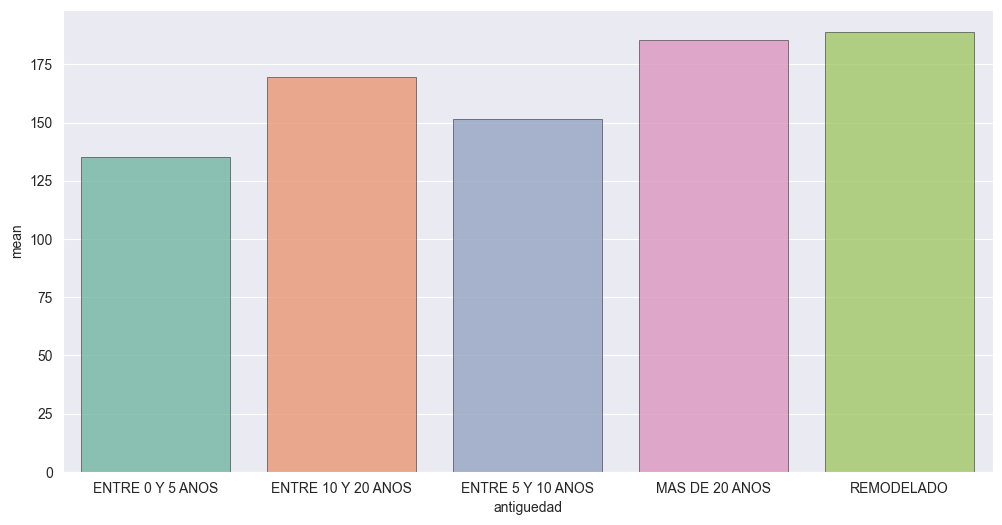

In [80]:
plt.figure(figsize=(12, 6))

sns.barplot(
    data=chapinero.groupby('antiguedad')['area'].describe().apply(lambda x: round(x,1)),
    x=chapinero.groupby('antiguedad')['area'].describe().apply(lambda x: round(x,1)).index,
    y='mean',
    # order=chapinero.groupby('antiguedad')['area'].describe().apply(lambda x: round(x,1)).
    edgecolor='black',
    linewidth=.4,
    alpha=.8,
    palette='Set2'
)

In [62]:
chapinero.groupby('barrio')['antiguedad'].describe().sort_values(by='count', ascending=False).head(10)

,count,unique,top,freq
barrio,,,,
S.C. CHICO NORTE,796,5,MAS DE 20 ANOS,281
S.C. EL CHICO,619,5,MAS DE 20 ANOS,215
LOS ROSALES,617,5,MAS DE 20 ANOS,305
S.C. CHICO NORTE III SECTOR,569,5,MAS DE 20 ANOS,273
S.C. BELLAVISTA,465,5,MAS DE 20 ANOS,263
S.C. ANTIGUO COUNTRY,320,5,ENTRE 0 Y 5 ANOS,98
LA CABRERA,313,5,MAS DE 20 ANOS,148
S.C. EL NOGAL,279,5,MAS DE 20 ANOS,191
CHICO RESERVADO,264,5,ENTRE 10 Y 20 ANOS,86


### Estrato

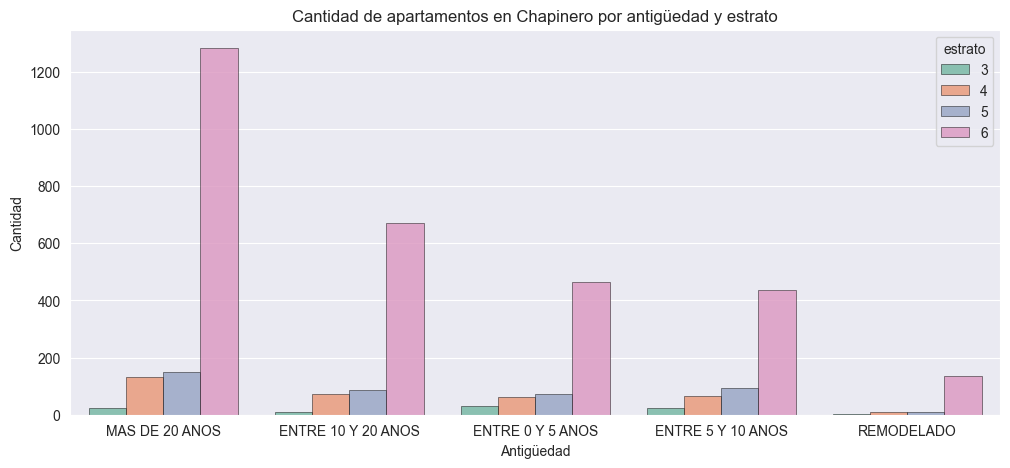

In [137]:
plt.figure(figsize=(12, 5))

sns.countplot(
    chapinero,
    x='antiguedad',
    order=chapinero.antiguedad.value_counts().index,
    palette='Set2',
    edgecolor='black',
    linewidth=.4,
    alpha=.8,
    hue='estrato',
    hue_order=[3, 4, 5, 6]
)

plt.title('Cantidad de apartamentos en Chapinero por antigüedad y estrato')
plt.xlabel('Antigüedad')
plt.ylabel('Cantidad')
plt.show()

## Barrios

In [93]:
chapinero.groupby('barrio')['codigo'].count().sort_values(ascending=False).to_frame().head(10)

,codigo
barrio,
S.C. CHICO NORTE,796
S.C. EL CHICO,619
LOS ROSALES,617
S.C. CHICO NORTE III SECTOR,569
S.C. BELLAVISTA,465
S.C. ANTIGUO COUNTRY,320
LA CABRERA,313
S.C. EL NOGAL,279
CHICO RESERVADO,264


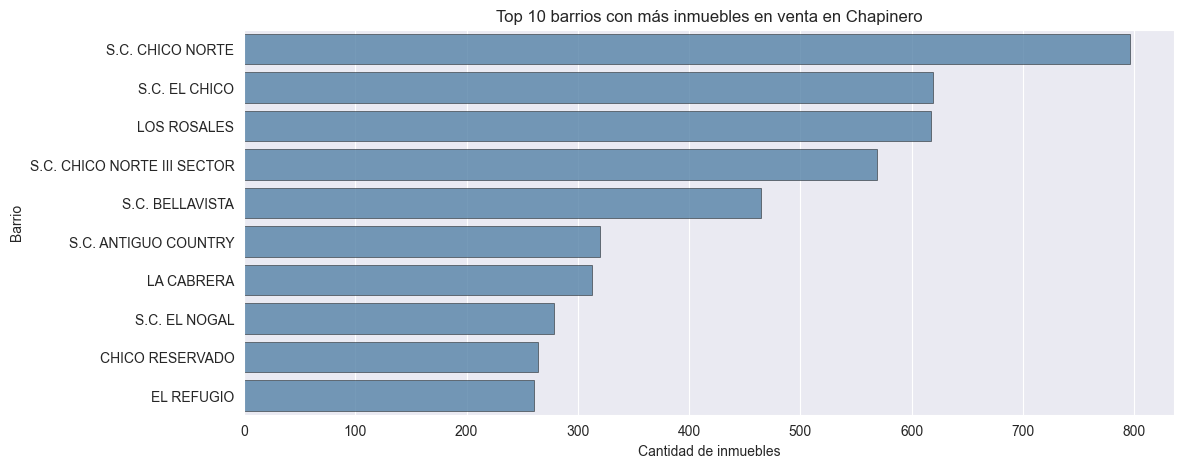

In [104]:
plt.figure(figsize=(12, 5))

sns.barplot(
    data=chapinero.groupby('barrio')['codigo'].count().sort_values(ascending=False).to_frame().head(10),
    x='codigo',
    y=chapinero.groupby('barrio')['codigo'].count().sort_values(ascending=False).to_frame().head(10).index,
    # palette='Set2',
    color='steelblue',
    orient='h',
    edgecolor='black',
    linewidth=.4,
    alpha=.8
)

plt.title('Top 10 barrios con más inmuebles en venta en Chapinero')
plt.xlabel('Cantidad de inmuebles')
plt.ylabel('Barrio')
plt.show()